<a href="https://colab.research.google.com/github/a-cuc/Computer-Vision-Crash-Course/blob/main/Activity%205.%20Line%20and%20Circle%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO. 5** | **Line and Circle Detection**
**Name** | Cu, Angelo Luis
**Section** | CPE32S3
**Date Performed**: | 2/18/2025
**Date Submitted**: | 2/20/2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

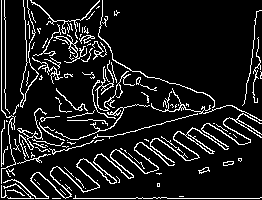

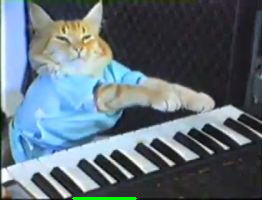

In [ ]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
- The minLineLength parameter, in the code it is `minLineLength = 20`
2. What is the mathematical formula for Hough transform and explain how it finds lines.
- According to the documentation, the lines are first expressed in the form of polar coordinates. It then plots the curves (from the polar form) of every line in the image, and if there are intersections and it reaches the threshold set, the transform has found a line.

Source: https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

The HoughCircles function would draw circles on an image based on the Hough Transform algorithm. Its parameters are the input image, output vector of circles (not specified as it is stored in the variable), the method of  detection, the accumulator resolution, minimum distance between circles, two method-specific parameters, and the minimum and maximum possible circle radius

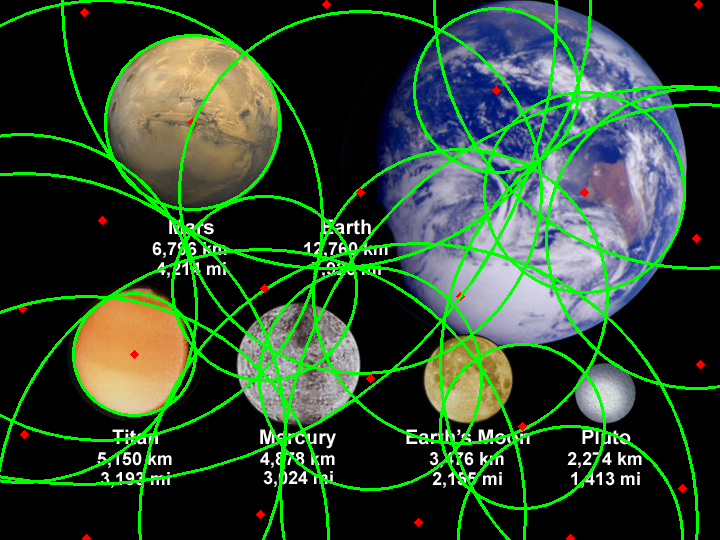

In [4]:
import cv2
import numpy as np

# Our testing value
n = 5

planets = cv2.imread('/content/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

The resulting images has too many false positives and it detects alot of circles, even though they are not one.

Change the value to 9, **what happens to the image**?

Compared to earlier, there are less false positives but there is still more than what is in the image. Compared to earlier, it is also able to correctly draw circles on the planets.

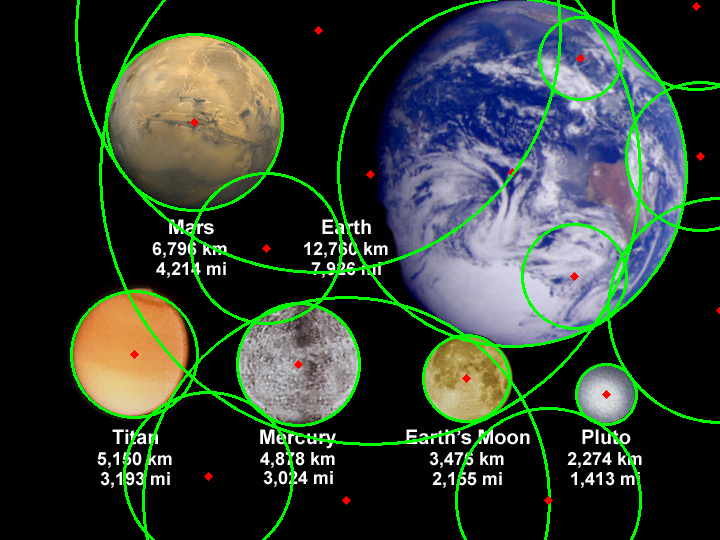

In [5]:
n = 9

planets = cv2.imread('/content/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles2.jpg", planets)
cv2_imshow(planets)

Lastly, change the value to 15, **what can you say about the resulting image?**

It is able to correctly detect all of the planets as circles and there are not false positives or extra circlces.

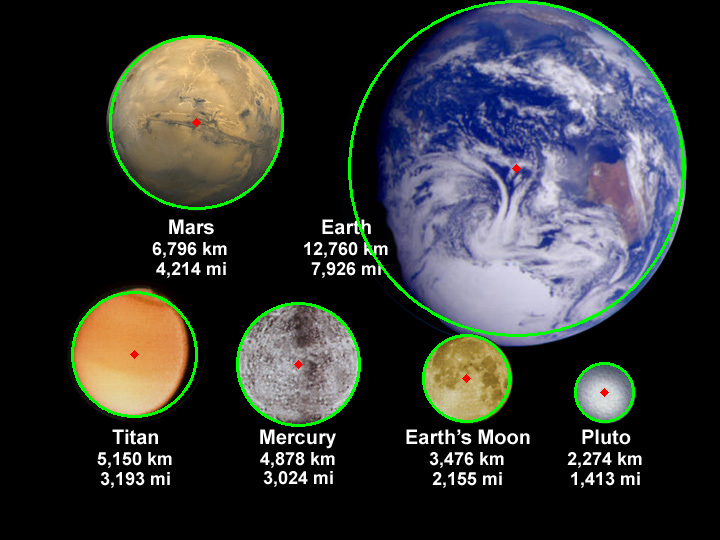

In [6]:
n = 15

planets = cv2.imread('/content/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles3.jpg", planets)
cv2_imshow(planets)

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

By changing the n parameter to be higher, it makes the circle detector more accurate by raising the threshold before it is classified as a circle.

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

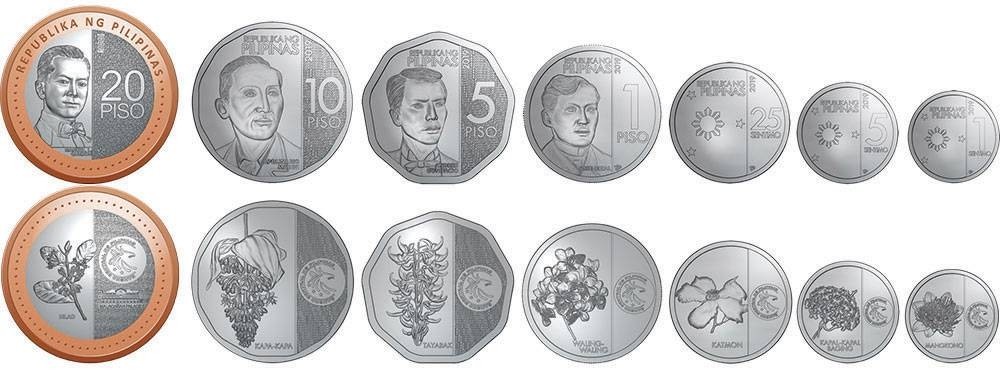

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

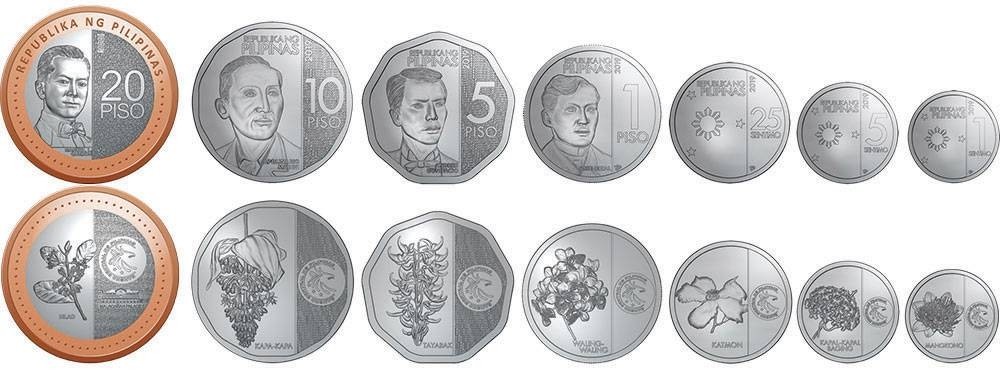

In [ ]:
supplementary_image = cv2.imread('money.jpg')
cv2_imshow(supplementary_image)

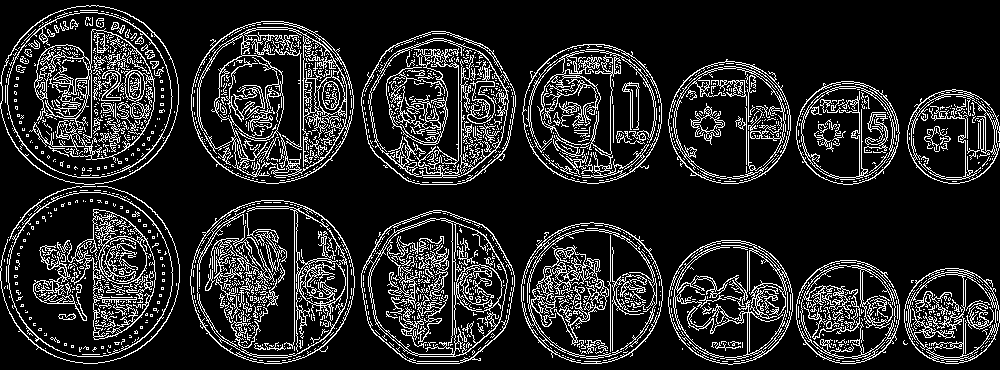

In [ ]:
def lineDetect(image_to_detect):
  gray = cv2.cvtColor(image_to_detect,cv2.COLOR_BGR2GRAY)
  edges = cv2.Canny(gray,50,120)
  minLineLength = 20
  maxLineGap = 5
  lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
                          maxLineGap)
  for x1,y1,x2,y2 in lines[0]:
    cv2.line(image_to_detect,(x1,y1),(x2,y2),(0,255,0),2)
  cv2_imshow(edges)
lineDetect(supplementary_image)

# The output is similar to the edge detection algorithm performed in the previous activity
# However, the result here is more sensitive compared to the edge detection algorithm.
# Lines have less parameters compared to circles, and as such houghlines cannot be used
# to count the number of circles, although the hough transform can be used to detect circles

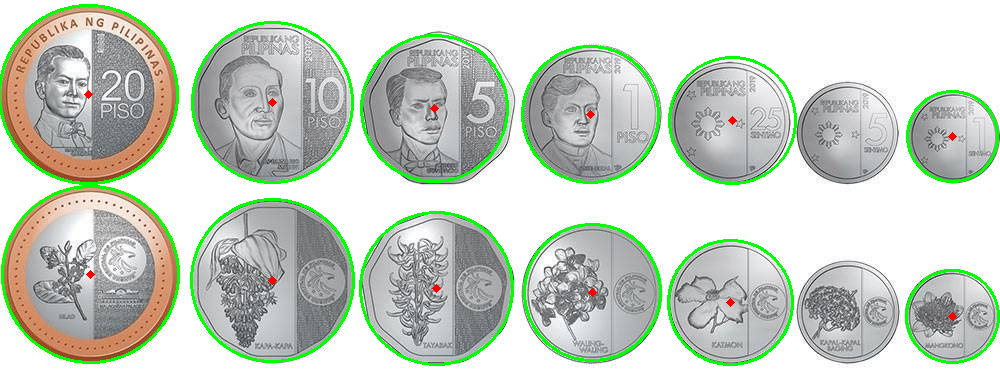

Number of circles: 12


In [ ]:
def circleDetect(image_to_detect, n=25):
  # NOTE: n must be odd
  image_copy = image_to_detect.copy()
  gray_img = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
  img = cv2.medianBlur(gray_img, n)
  cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
  circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                             param1=100,param2=30,minRadius=0,
                             maxRadius=0)
  circles = np.uint16(np.around(circles))

  for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(image_copy,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(image_copy,(i[0],i[1]),2,(0,0,255),3)
  cv2_imshow(image_copy)
  print("Number of circles: " + str(len(circles[0])))
circleDetect(supplementary_image)
# After multiple attempts with manipulating the n parameter,
# the best the algorithm can detect is 12 circles

# As seen in the image below, the output is the number of circles detected
# and the circles detected were drawn. Therefore, houghcircles can be used
# to count the number of circles.

## 5. Summary, Conclusions and Lessons Learned

To conclude, by using the Hough transform algorithm, I am able to detect lines and circles. I also learned how to implement this on OpenCV, and I was able to perform the supplementary exercise to detect the number of cirlces in the image, although it is incomplete.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*